# K Nearest Neighbors

KNN is the simplest machine learning algorithm. Building your model only consists of training the algorithm. To make a prediction with KNN all the algorithm does is find the data points closest from the training data set to your data point in question.  

## How Does KNN Work?

KNN works by comparing your test data point to all data points in the model. What ever classification the closes data point has, that is the classification your algorithm assigns to you test data point.  

There is one more dimension of complexity, that is how many of the nearest neighbors are compared. You can specify the amount of neighbors or the k value. If you are comparing the 5 nearest neighbors, the classification of the majority of them is what the algorithm will classify the test data as. 

## KNN Decision Boundaries

For two dimensional datasets, its easy to visualize how k Nearest Neighbors works. We can color the plan according to the class that would be assigned  to a point in that region. This shows the decision boundary of the algorithm. 

## KNN Parameters

There are two important parameters to the kNN algorithm, the number of neighbors and how distance is measured between points. Using a small number of neighbors (<=5) usually works well, but you should adjust this parameter. I have never used anything but Euclidean distance.  

## Advantages and Disadvantages of KNN 

KNN main advantage is that its easy to understand. Its fast simple so its really easy to set up. Disadvantages are it doesn't work with high dimensionality, you need to preprocess your data and it can be slow depending on the dimensionality. 

Lets get into the code...

In [1]:
#import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [6]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Dataset

I'm going to be working in the penguins dataset. I'm going to drop all NA values and use KNN to predict sex in penguins based off of the other factors. This dataset only has 6 dimensions, low dimensionality is helpful with KNN.

In [12]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [14]:
df.dropna(axis=0, how='any', inplace=True)

## Data Munging

Super easy, just dropped all 'NA' values. Since this writeup is about deconstructing KNN, that's fine. I still have 333 values to work with enough to do train test split or k-fold cross validation.

I will have to normalize numerical data and recode categorical data. Will be fairly easy, then I can get into the ML models.

In [17]:
#lists of categoricals/numerics
categorical = ['species','island','sex']
numeric = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

In [33]:
#categorical munging
for column in categorical:
    print(df[column].unique())

[0 1 2]
[0 1 2]
[1 0]


### Categorical Data Munging

Easy, a maximum of 3 categorical values for three columns. I'm going to demonstrate three separate ways of converting categorical variables into numerics.

In [32]:
#using pandas categorical method with .codes
df['species']=pd.Categorical(df['species']).codes

#using replace
df['island'].replace(['Torgersen','Biscoe','Dream'],[0,1,2], inplace=True)

#using get dummies
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)

### Numerica Data Munging

We need all of our numerical data to be on a similar scale. KNN is based off of closeness of points to one another so if the scale is different, it can really throw off the calculations.


In [36]:
X = df.drop('sex', axis=1)
y=df['sex']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data)

### Scaled DataFrame and Algorithm Loading

The datafram is looking good, all of the numerics are scaled between 0-1.

In [37]:
X_scaled.head()

,0,1,2,3,4,5
0,0.0,0.0,0.254545,0.666667,0.152542,0.291667
1,0.0,0.0,0.269091,0.511905,0.237288,0.305556
2,0.0,0.0,0.298182,0.583333,0.389831,0.152778
3,0.0,0.0,0.167273,0.738095,0.355932,0.208333
4,0.0,0.0,0.261818,0.892857,0.305085,0.263889


## KNN Algorithm Exploration/Analysis

Now I need to load the actual algorithm from SKlearn. This algorithm is pretty simplistic:

sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

The most important parameter is n_neighbors which stands for number of neighbors, this is number of other points the point in question is being compared to. 

The documentation can be found here:  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## KNN Algorithm Code Description

I'm going to split the data into training and test sets and use the square root of the number of values as my starting number of neighbors. I will use accuracy score to score my algorithm

In [50]:
#train/test/split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=1) 

from sklearn.neighbors import KNeighborsClassifier
method = KNeighborsClassifier(n_neighbors=19)

method.fit(X_train, y_train)

predictions = method.predict(X_test)


In [45]:
from sklearn.metrics import accuracy_score
a_score = str(round(accuracy_score(y_test, predictions),3))
print('Accuracy Score:  '+ a_score)

Accuracy Score:  0.88


## KNN Algorithm Results Analysis

I got a decent accuracy score, 88% accurate. Next I want to grpah how precision changes based on different neighbors values for the  KNN algorithm. Under/overfitting are difficult to explain, but easier when you can visualize them!

<AxesSubplot:>

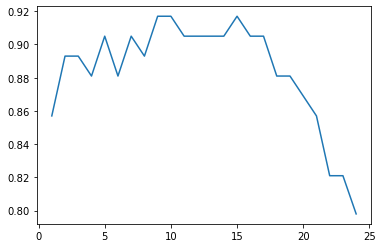

In [49]:
#instantiating lists to track neighbor and accuracy scores
neighbors = []
accuracy = []

#looping through numbers for neighbors
for i in range(1,25):
    method = KNeighborsClassifier(n_neighbors=i)
    method.fit(X_train, y_train)
    predictions = method.predict(X_test)
    a_score = round(accuracy_score(y_test, predictions),3)
    neighbors.append(i)
    accuracy.append(a_score)

#create seaborn lineplot of data
sns.lineplot(x=neighbors, y=accuracy)

## KNN Hyperparameter Analysis Using a Lineplot, Under and Over Fitting

What I did above is a visual representation of KNN Hyperparameter tuning. This is a graph of the accuracy vs. the number of neighbors specificied for our algorithm. You can see that when the number of neighbors is low, the accuracy suffers. This is because of underfitting, which is when an algorithm cannot capture the underlying trend of the data. On the other end is overfitting, where the data is fit very well to the noise of the data, but not so well to the underlying data. 

## Conclusion

This is the end of my notes re: KNN. The important things to remember are:
-  KNN is easy to implement and should be the first classification algo tried
-  Data going into KNN cannot have nan values
-  Data going into to KNN needs to be preprocessed
-  There is one important hyperparameter, n_neighbors
-  KNN works best on lower dimensionality data

